In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# The column width is 3.35in. 1.5 aspect ratio. 
# You can change the aspect ratio if something else works better for your plot
mpl.rcParams['figure.figsize'] = [3.35, 2.23]

# Title and labels about the same size as the figure caption
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.titlesize'] = 18

# A legend too big usually gets in the way. 
# AAS recommends at least 6pt font size.
mpl.rcParams['legend.fontsize'] = 16

# I find these appropiate, but you can adjust them to your needs
# AAS recommends a minimum line width of 0.5 pt.
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.linewidth'] = .7
mpl.rcParams['lines.markersize'] = 7


# Sensitivity plot

In [32]:
_E = np.array([40.86982000518911,71.86024939675998,130.52763804649032,229.00194871132365,408.64565359861126,
               717.0334623948247,1301.4219793745847,2321.444580634583,4066.016029616799,7244.471377942968,
               12881.037956045491,22841.381037775263,40514.0387759719,71841.77239590057,125249.9408945374,
               222128.79943544255,400633.60548632,698111.0351406115,])
_LAT_sens_l0_b30 = np.array([5.153724655961664e-12,2.8981523526996577e-12,1.9744882128159428e-12,
                           1.4936279236841406e-12,1.1298747492786165e-12,8.399287059458493e-13,
                           6.353752638084506e-13,5.064603543891735e-13,4.806380863064408e-13,
                           4.482446879289336e-13,5.526170019854132e-13,9.82707436268099e-13,
                           1.687612475788159e-12,3.0010465178188933e-12,5.336699231206324e-12,
                           9.326033468832219e-12,1.6584293294958207e-11,3.162277660168392e-11])
_LAT_sens_l45_b120 = np.array([3.3321709412448236e-12,1.6015682644458437e-12,9.490142360424793e-13,
                           6.579332246575709e-13,4.404933880954328e-13,3.0538555088334375e-13,
                           2.310129700083177e-13,1.9067907229606037e-13,1.9744882128159508e-13,
                           2.230924374408997e-13,3.9672068803654845e-13,7.054802310718689e-13,
                           1.211527658628595e-12,2.1544346900318957e-12,3.831186849557309e-12,
                           6.81292069057965e-12,1.2115276586285901e-11,2.2309243744089878e-11])





Estimated flux from DM annihilation around a Kerr black hole for the model described in Schnittman (2015) with threshold energy E_com = 3 m_\chi. The annihilation cross section is taken to be constant above the threshold: \sigma(E_com>E_th)=10^{-33} cm^2, and all flux predictions scale linearly with \sigma. The solid lines correspond to a DM mass of 1 GeV, and dashed lines 10 GeV. 
This plot can be used to constrain the cross section if Fermi gives only upper limits on the flux. For example, if we can constrain the flux from NGC 1277 to be F<10^{-13}, then we can say \sigma_th < 10^{-36} cm^2 for m_X=10 GeV, or \sigma_th<10^{-37} for m_X = 1 GeV.

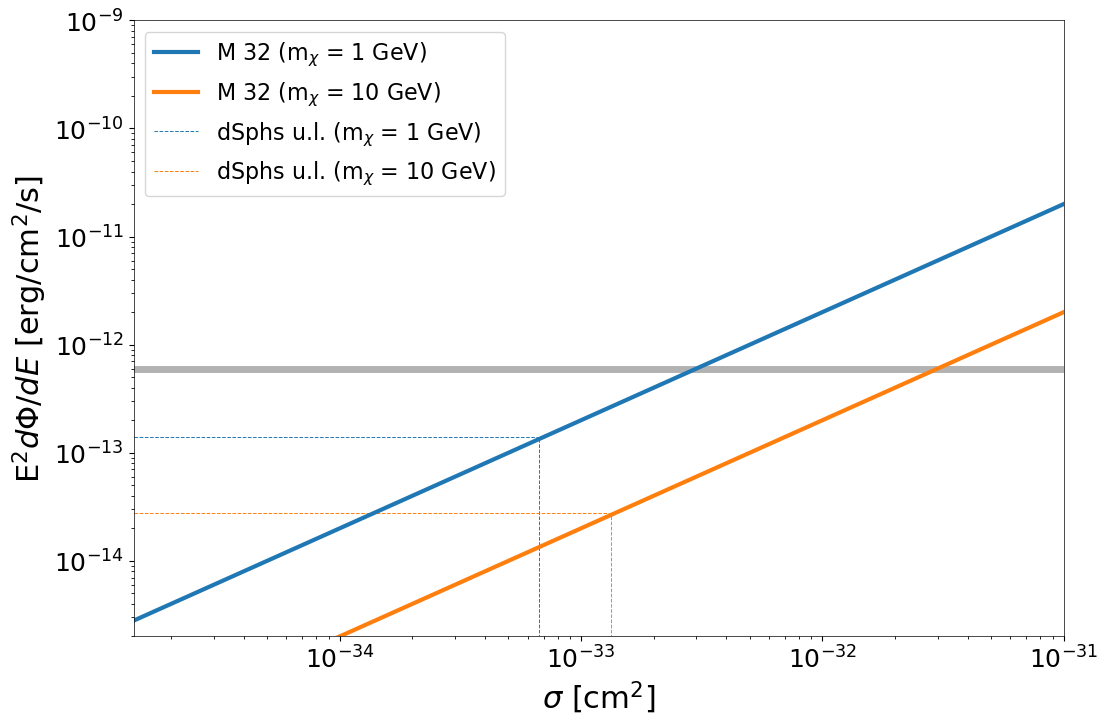

Factor for m=1 GeV 4.285714285714286
Factor for m=10 GeV 21.428571428571427


In [90]:
scale = np.logspace(-5, 5, 100)

lat_sensitivity = 6e-13 #erg/cm2/s

M32_annDM10cs = 1e-33 #cm2
M32_annDM10flux = 2e-14 #erg/cm2/s 

M32_annDM1cs = 1e-33 #cm2
M32_annDM1flux = 2e-13 #erg/cm2/s 

v = 15*100000 #cm/s 
cs_1gev_dSphs = 1e-27 / v #cm2
cs_10gev_dSphs = 2e-27 / v #cm2

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(M32_annDM1cs*scale, M32_annDM1flux*scale, linewidth=3, label='M 32 (m$_\chi$ = 1 GeV)')
plt.plot(M32_annDM10cs*scale, M32_annDM10flux*scale, linewidth=3, label='M 32 (m$_\chi$ = 10 GeV)')
plt.vlines(cs_1gev_dSphs, 1e-15, 1.4e-13, color='tab:blue', linestyle='--', label='dSphs u.l. (m$_\chi$ = 1 GeV)')
plt.vlines(cs_10gev_dSphs, 1e-15, 2.8e-14, color='tab:orange',  linestyle='--', label='dSphs u.l. (m$_\chi$ = 10 GeV)')

plt.hlines(lat_sensitivity, 1e-31, 1e-35, color='0.4', linewidth=5, alpha=0.5)#label='LAT sensitivity (1$-$10 GeV)', 
plt.hlines(1.4e-13, 1e-35, cs_1gev_dSphs, color='tab:blue', linestyle='--',)
plt.hlines(2.8e-14, 1e-35, cs_10gev_dSphs, color='tab:orange', linestyle='--',)

plt.xlabel('$\sigma$ [cm$^2$]', size=22)
plt.ylabel('E$^2 d\Phi/dE$ [erg/cm$^{2}$/s]', size=22)
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-15, 1e-9)
plt.xlim(1.4e-35, 1e-31)
plt.legend(loc=2, fontsize=16)

plt.savefig('Predicted_DM_limits.pdf')
plt.show()



print('Factor for m=1 GeV', lat_sensitivity/1.4e-13)
print('Factor for m=10 GeV', lat_sensitivity/2.8e-14)

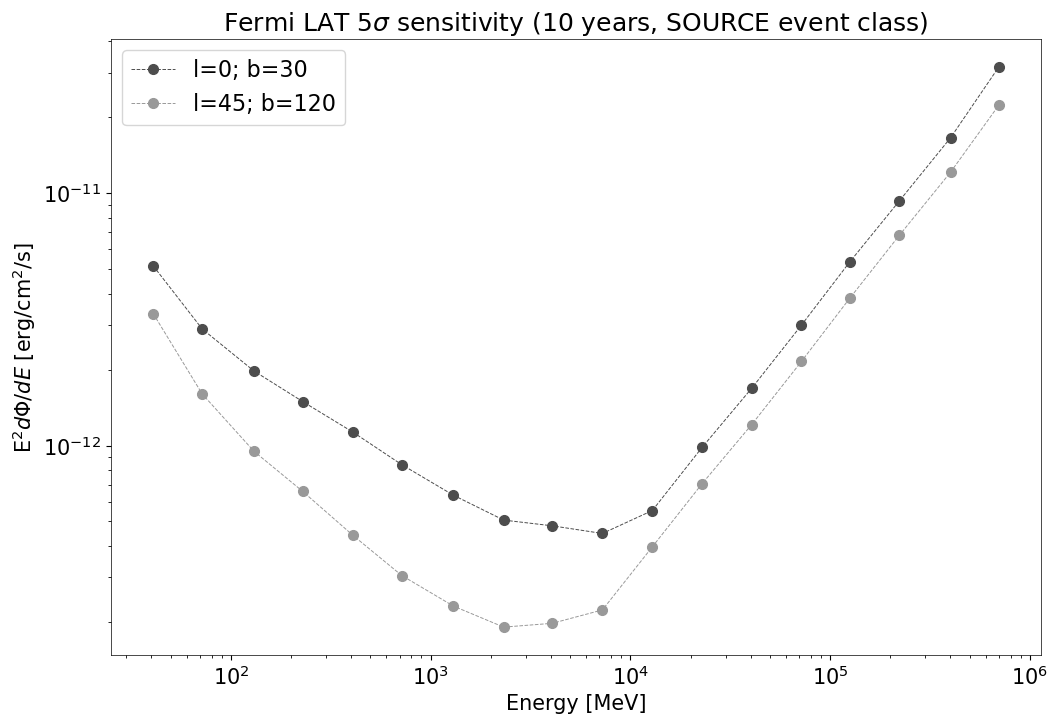

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Fermi LAT 5$\sigma$ sensitivity (10 years, SOURCE event class)')
plt.plot(_E, _LAT_sens_l0_b30, 'o--', color='0.3', label='l=0; b=30')
plt.plot(_E, _LAT_sens_l45_b120, 'o--', color='0.6', label='l=45; b=120')

### We should add here the expected flux level for our stacking analysis
# plt.plot([10000], [M32_annDMflux], '*', markersize=15, label='M 32')
# plt.plot([10000], [NGC5077_annDMflux], '*', markersize=15, label='NGC 5077')
# plt.plot([10000], [M87_annDMflux], '*', markersize=15, label='M 87')
# plt.plot([10000], [NGC127_annDMflux], '*', markersize=15, label='NGC 127')


plt.xlabel('Energy [MeV]')
plt.ylabel('E$^2 d\Phi/dE$ [erg/cm$^{2}$/s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.savefig('LAT_sensitivity.pdf')
plt.show()

# Map of sources

In [12]:
df = pd.read_csv('EGsTable.csv', delimiter=';', index_col=False)
gal_name = df['Name'].values
gal_dist = df['Distance[Mpc]'].values
gal_bhmass = df['M_BH[Msolar*10e6]'].values
gal_b = df['b'].values
gal_l = df['l'].values
gal_l[gal_l>180] = gal_l[gal_l>180] - 360

gal_0_10_Mpc = np.where((gal_dist<=20)&(gal_dist>0))[0]
gal_10_100_Mpc = np.where((gal_dist<=100)&(gal_dist>20))[0]
gal_100_plus_Mpc = np.where(gal_dist>100)[0]

dist_w = 1/(gal_dist/max(gal_dist)) * 2


list_prints = ['M 32', 'M 87', 'NGC 6251', 'NGC 5077']

array([2.45e+00, 5.69e+01, 4.16e+02, 1.78e+02, 2.02e+02, 9.00e+01,
       6.96e+01, 6.00e+02, 4.72e+03, 6.15e+03, 2.54e+03, 1.30e+01,
       1.44e+01, 9.25e+02, 5.90e+02, 8.81e+02, 1.69e+02, 1.37e+02,
       1.47e+03, 4.65e+02, 1.45e+01, 2.73e+02, 4.87e+02, 9.78e+02,
       2.10e+03, 2.48e+03, 4.65e+03, 5.29e+02, 2.44e+03, 8.55e+02,
       1.30e+03, 3.87e+03, 3.72e+03, 2.30e+03, 3.69e+03, 1.08e+01,
       3.96e+02, 1.49e+01, 9.09e+03, 2.08e+04, 6.14e+02, 1.34e+03,
       3.74e+03, 3.74e+03, 2.66e+03])

M 32 dist =  [0.805]
M 32 dist =  [16.68]
M 32 dist =  [108.4]
M 32 dist =  [38.7]


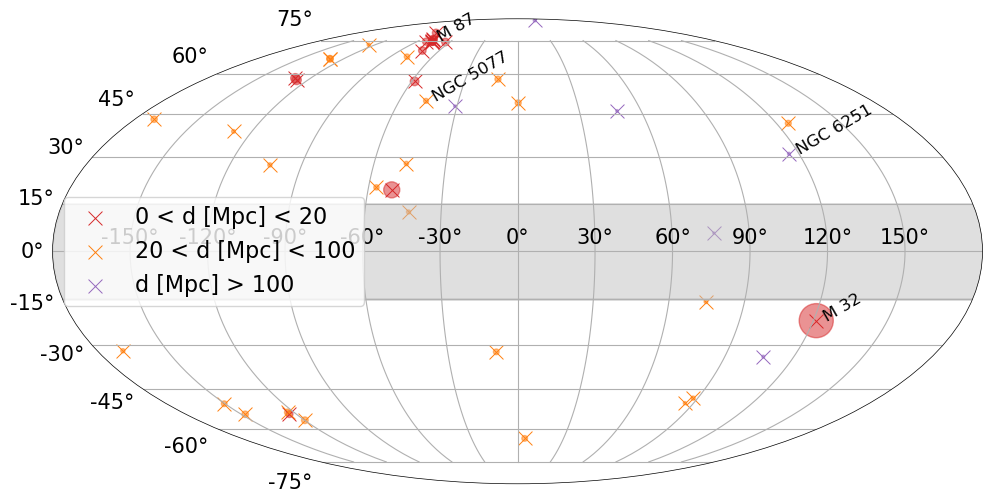

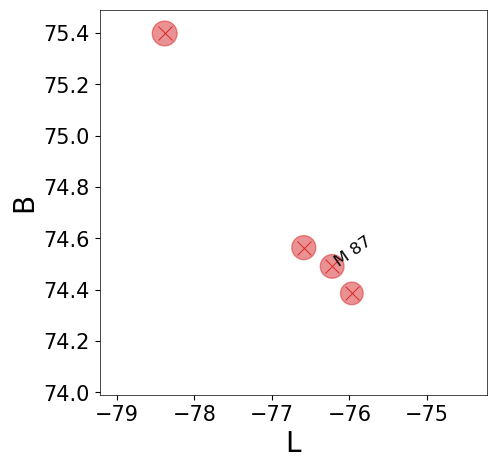

In [13]:
x = np.linspace(-np.pi, np.pi, 10)
y1 = np.full(len(x),  np.radians(-15))
y2 = np.full(len(x),  np.radians(+15))

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplot(111, projection="mollweide")

plt.scatter( np.radians(gal_l[gal_0_10_Mpc]),  np.radians(gal_b[gal_0_10_Mpc]), 
            s=dist_w[gal_0_10_Mpc], facecolors='tab:red', edgecolors='tab:red', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_10_100_Mpc]),  np.radians(gal_b[gal_10_100_Mpc]), 
            s=dist_w[gal_10_100_Mpc], facecolors='tab:orange', edgecolors='tab:orange', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_100_plus_Mpc]),  np.radians(gal_b[gal_100_plus_Mpc]), 
            s=dist_w[gal_100_plus_Mpc], facecolors='tab:purple', edgecolors='tab:purple', alpha=0.5)
plt.scatter( np.radians(gal_l[gal_0_10_Mpc]),  np.radians(gal_b[gal_0_10_Mpc]), 
            s=100, facecolors='tab:red', marker='x', label='0 < d [Mpc] < 20')
plt.scatter( np.radians(gal_l[gal_10_100_Mpc]),  np.radians(gal_b[gal_10_100_Mpc]), 
            s=100, facecolors='tab:orange',  marker='x', label='20 < d [Mpc] < 100')
plt.scatter( np.radians(gal_l[gal_100_plus_Mpc]),  np.radians(gal_b[gal_100_plus_Mpc]), 
            s=100, facecolors='tab:purple',  marker='x', label='d [Mpc] > 100')
plt.fill_between(x, y1, y2, color='silver', alpha=0.5)

for g in list_prints:
    print('M 32 dist = ', gal_dist[df['Name'] == g])
    plt.text( np.radians(gal_l[df['Name'] == g]+2),  np.radians(gal_b[df['Name'] == g]), g, fontsize=12, rotation=30)
plt.legend(fontsize=16)
plt.grid('on')
plt.savefig('Map_elliptical_galaxies.pdf')




#------------ Zoom around M87
fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(111)
plt.scatter( gal_l[gal_0_10_Mpc],  gal_b[gal_0_10_Mpc], 
            s=10*dist_w[gal_0_10_Mpc], facecolors='tab:red', edgecolors='tab:red', alpha=0.5)
plt.scatter( gal_l[gal_10_100_Mpc],  gal_b[gal_10_100_Mpc], 
            s=10*dist_w[gal_10_100_Mpc], facecolors='tab:orange', edgecolors='tab:orange', alpha=0.7)
plt.scatter( gal_l[gal_100_plus_Mpc],  gal_b[gal_100_plus_Mpc], 
            s=10*dist_w[gal_100_plus_Mpc], facecolors='tab:purple', edgecolors='tab:purple', alpha=0.7)
plt.scatter( gal_l[gal_0_10_Mpc],  gal_b[gal_0_10_Mpc], 
            s=100, facecolors='tab:red', marker='x', label='0 < d[Mpc] < 20')
plt.scatter( gal_l[gal_10_100_Mpc],  gal_b[gal_10_100_Mpc], 
            s=100, facecolors='tab:orange',  marker='x', label='20 < d[Mpc] < 100')
plt.scatter( gal_l[gal_100_plus_Mpc],  gal_b[gal_100_plus_Mpc], 
            s=100, facecolors='tab:purple',  marker='x', label='d[Mpc] > 100')
plt.fill_between(x, y1, y2, color='silver', alpha=0.5)

g = 'M 87'

plt.text(gal_l[df['Name'] == g], gal_b[df['Name'] == g], g, fontsize=12, rotation=35)
plt.xlim(gal_l[df['Name'] == g]-3, gal_l[df['Name'] == g]+2)
plt.ylim(gal_b[df['Name'] == g]-0.5, gal_b[df['Name'] == g]+1)
plt.xlabel('L', size=20)
plt.ylabel('B', size=20)



plt.show()



# Source ranking

In [9]:
def get_mass_weigths(_mass, index=3):
    w = np.power(_mass, index)
    w = w/np.nanmax(w)
    return w

def get_dist_weights(_dist, index=-2):
    _dist[_dist == 0.] = np.nan
    w = _dist**index
    w = w/np.nanmax(w)
    return w

In [14]:
w_m_gal = get_mass_weigths(gal_bhmass.astype(float))
w_d_gal = get_dist_weights(gal_dist.astype(float))

w_total = w_m_gal * w_d_gal / np.amax(w_m_gal * w_d_gal)

iii = np.argsort(w_total)[::-1]
gal_name_rank = gal_name[iii]
gal_w = w_total[iii]
gal_d_rank = gal_dist[iii]
gal_m_rank = gal_bhmass[iii]

print('#', 'Name', 'dist[Mpc]', 'mass[1e6M_sun]')
for i, g in enumerate(gal_name_rank):
    print(i, g.replace(' ', ''), gal_d_rank[i], gal_m_rank[i], gal_w[i])

# Name dist[Mpc] mass[1e6M_sun]
0 NGC4889 102.0 20800.0 1.0
1 M87 16.68 6150.0 0.9665928835419144
2 NGC4649 16.46 4720.0 0.4487212871656326
3 NGC1407 29.0 4650.0 0.1382207361050736
4 NGC3842 92.2 9090.0 0.10215041755004095
5 NGC4472 16.72 2540.0 0.06777022730496406
6 NGC1550 52.5 3870.0 0.02431222055324747
7 NGC3091 53.02 3720.0 0.02117189402522775
8 IC1459 28.92 2480.0 0.02108476688932146
9 NGC5516 55.3 3690.0 0.01899499460333137
10 NGC4751 32.81 2440.0 0.015601535975836956
11 NGC6861 28.71 2100.0 0.012989781258926079
12 NGC1332 22.66 1470.0 0.007152247454396763
13 NGC7619 53.85 2300.0 0.004850901223809975
14 NGC6086 138.0 3740.0 0.0031759011199834924
15 NGC4374 18.51 925.0 0.0026706851977216835
16 A1836BCG 152.4 3740.0 0.0026040853315011272
17 NGC1399 20.85 881.0 0.0018185529270424259
18 NGC4291 26.58 978.0 0.0015307946995334952
19 A3565BCG 49.2 1300.0 0.0010493254108417606
20 NGC4486B 16.26 600.0 0.0009445457696258422
21 NGC3379 10.7 416.0 0.0007269805223163596
22 NGC1374 19.57 590.

/Users/mnegro/opt/anaconda3/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


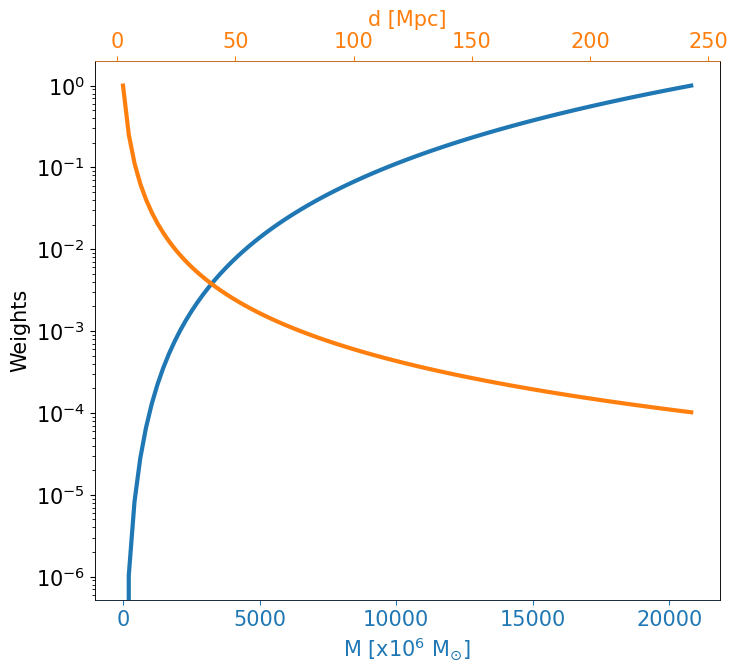

In [11]:
gal_bhmass[gal_bhmass == '...'] = np.nan
gal_bhmass = gal_bhmass.astype(float)

_d = np.linspace(0., np.nanmax(gal_dist), 100)
_m = np.linspace(0., np.nanmax(gal_bhmass.astype(float)), 100)

fig, ax = plt.subplots(figsize=(10,7))
fig.subplots_adjust(right=0.75)

ax1 = ax.twiny()

# ax.plot(gal_bhmass.astype(float), w_m_gal, 'o', color='tab:blue', linewidth=3)
ax.plot(_m, get_mass_weigths(_m), color='tab:blue', linewidth=3)
# ax1.plot(gal_dist.astype(float), w_d_gal, 'o', color='tab:orange', linewidth=3)
ax1.plot(_d, get_dist_weights(_d), color='tab:orange', linewidth=3)


plt.yscale('log')
ax.set_ylabel('Weights')

ax.set_xlabel('M [x10$^6$ M$_{\\odot}$]')
ax1.set_xlabel('d [Mpc]')

ax.xaxis.label.set_color('tab:blue')
ax1.xaxis.label.set_color('tab:orange')

ax.spines["bottom"].set_edgecolor('tab:blue')
ax1.spines["top"].set_edgecolor('tab:orange')

ax.tick_params(axis='x', colors='tab:blue')
ax1.tick_params(axis='x', colors='tab:orange')

plt.show()